# HEART DISEASE PREDICTION 

Heart disease prediction using 3 machine learning models.
1. Support Vector Machine 
2. K Nearset Neighbour 
3. ANN Multilayer Perceptron

## DATA DESCRIPTION

South Africa Heart Disease Dataset
Source:<br>
- https://web.stanford.edu/~hastie/ElemStatLearn//data.html<br>
- https://www.openml.org/d/1498


A **retrospective sample** of males in a **heart-disease high-risk region** of the Western Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal. 

Attributes:

- _sbp_ systolic blood pressure 
- _tobacco_ cumulative tobacco (kg) 
- _ldl_ low densiity lipoprotein cholesterol 
- _adiposity_ 
- _famhist_ family history of heart disease (Present, Absent) 
- _typea_ type-A behavior 
- _obesity_ 
- _alcohol_ current alcohol consumption 
- _age_ age at onset 
- _chd_ response, coronary heart disease 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### DATA PREPROCESSING  

In [2]:
# Reading the data 
data = pd.read_csv('https://www.openml.org/data/get_csv/1592290/phpgNaXZe')

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [4]:
# Setting up the column names
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']

In [5]:
data.columns = column

In [6]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


Describes the statistical data insights

In [7]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


Checking for any missing values 

In [8]:
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

The values shown are 0, therefore no missing values in the DataFrame.

**Feature Scaling** : making categorical data precise 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()
# 1 or 2 -> 0 or 1
data['famhist']=encoder.fit_transform(data['famhist'])
# 1 or 2 -> 0 or 1
data['chd']=encoder.fit_transform(data['chd'])

In [11]:
# check
data.head(5)

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale = MinMaxScaler(feature_range =(0,100))
# setting scale of max min value for sbp in range of 0-100, normalise
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

/Users/ame/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
# Data after modification
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,31.903282,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,17.518220,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,0.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,19.658120,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,28.205128,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,40.170940,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,100.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


The variation of values across the DataFrame through _boxplots_.
Box graph of the Features represent:
- Upper Extreme 
- Upper Quartile 
- Median 
- Lower Quartile 
- Lower Extreme

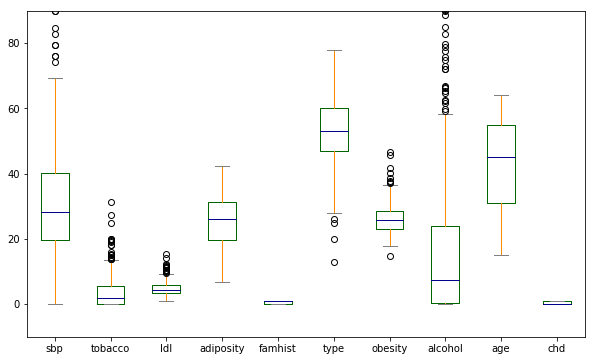

In [33]:
#data.boxplot(figsize=(10,5))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
data.plot(kind='box',figsize=(10,6),color=color,ylim=[-10,90])

Distribution of Obesity according to the age

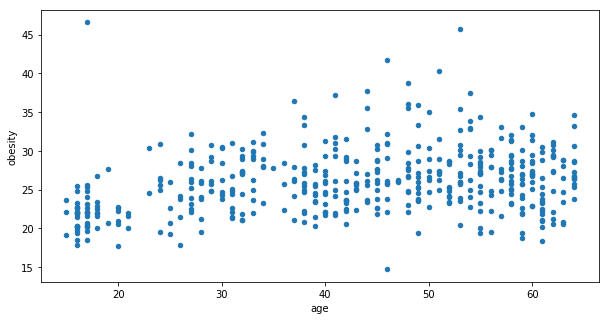

In [24]:
data.plot(x='age',y='obesity',kind='scatter',figsize =(10,5))

Distribution of Tobacco consumption across age

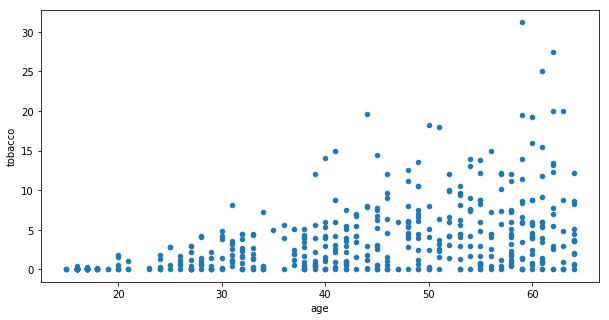

In [25]:
data.plot(x='age',y='tobacco',kind='scatter',figsize =(10,5))

Distribution of Alcohol consumption across age

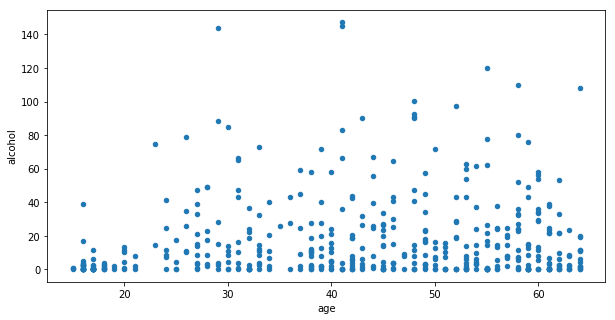

In [26]:
data.plot(x='age',y='alcohol',kind='scatter',figsize =(10,5))

General correlation of the features through a _scatter matrix_.

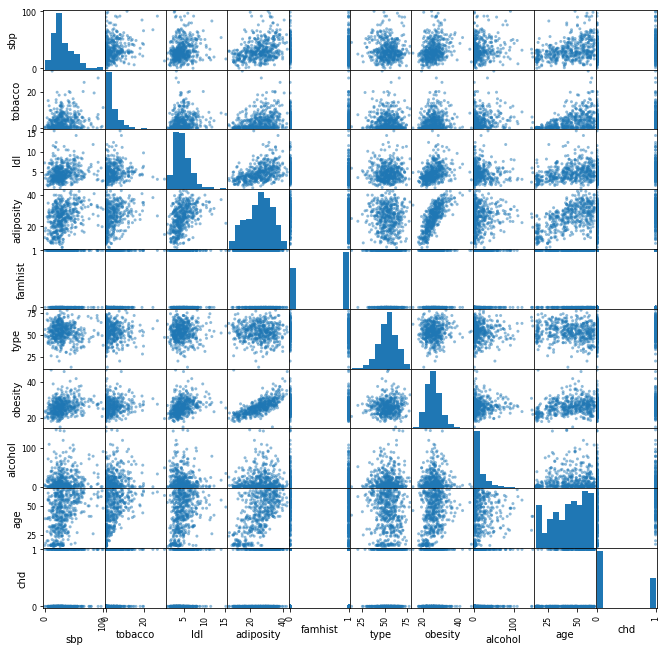

In [30]:
pd.plotting.scatter_matrix(data, figsize=(11, 11))
plt.show()

Splitting the data into _test_ (20%) and _train_ (80%):

In [40]:
from sklearn.model_selection import train_test_split

col = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age']

X_all = data[col]
y_all = data['chd']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=1234)

Now, the results of the model does depends on the random state on which we distribute the data, since it's too small data the model understand relative pattern with given test set 
- at random state 42, we obtain results as SVM,ANN and least with KNN
- at random state 1234, we obtain results as ANN,SVM and least with KNN

To overcome this issue, we've used K-fold too, to increase the accuracy, which gives much higher accuracy as the fold increase and a small increase in mean accuracy too.

Heatmap Of the realtion features

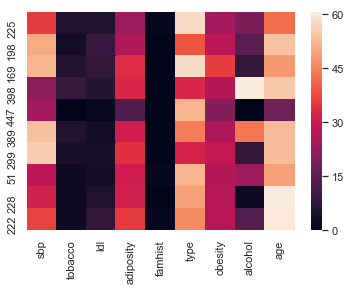

In [41]:
sns.set()
sns.heatmap(X_train.head(10),robust = True)

Data preprocessing is complete,
implementing the models

# 1. Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. <br>
In other words, given labeled training data (_supervised learning_), the algorithm outputs an optimal hyperplane which categorizes new examples.<br>

*Description* : https://en.wikipedia.org/wiki/Support_vector_machine <br>
*Kernel used* : Linear<br>
*Degree* =3<br>
*Gamma* = Auto

In [42]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [43]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred_svm =svm_clf.predict(X_test)

In [45]:
y_pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0])

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[51,  9],
       [15, 18]])

In [50]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])

In [72]:
print("- Accuracy : %f \n- Recall : %f \n- Precision : %f" % (svm_result, recall_svm, precision_svm))

- Accuracy : 0.741935 
- Recall : 0.850000 
- Precision : 0.739130


# 2. K Nearest Neighbour

In pattern recognition, the _k-nearest neighbors algorithm_ (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. ... In k-NN classification, the output is a class membership.<br>

- *Description* : https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
- *Neighbors* =5
- *N jobs* = No of cores, -1
- *Leaf size* =60
- *Algorithm* = Brute

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

In [53]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[49, 11],
       [22, 11]])

In [60]:
knn_result = accuracy_score(y_test,y_pred_knn)
recall_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
precision_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])

In [71]:
print("- Accuracy : %f \n- Recall : %f \n- Precision : %f" % (knn_result, recall_knn, precision_knn))

- Accuracy : 0.645161 
- Recall : 0.816667 
- Precision : 0.816667


## Cross Validation with KFold

Cross Validation recovers from the random state difference by diving the complete data set in K parts, and iteratively learns from data.<br>

- *Folds* =10

In [77]:
from sklearn.model_selection import KFold

fold_list =[]
accuracy_list =[]
def run_kfold(knn_clf):
    kf = KFold(n_splits=20)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_all):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        knn_clf.fit(X_train, y_train)
        predictions = knn_clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("\nFold {0} accuracy: {1}".format(fold, accuracy))
        fold_list.append(fold)
        accuracy_list.append(accuracy)
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(knn_clf)


Fold 1 accuracy: 0.5833333333333334
Mean Accuracy: 0.5833333333333334

Fold 2 accuracy: 0.5
Mean Accuracy: 0.5416666666666667

Fold 3 accuracy: 0.6956521739130435
Mean Accuracy: 0.5929951690821257

Fold 4 accuracy: 0.5217391304347826
Mean Accuracy: 0.5751811594202899

Fold 5 accuracy: 0.6086956521739131
Mean Accuracy: 0.5818840579710145

Fold 6 accuracy: 0.7391304347826086
Mean Accuracy: 0.6080917874396136

Fold 7 accuracy: 0.6086956521739131
Mean Accuracy: 0.6081780538302278

Fold 8 accuracy: 0.5217391304347826
Mean Accuracy: 0.5973731884057971

Fold 9 accuracy: 0.5652173913043478
Mean Accuracy: 0.5938003220611916

Fold 10 accuracy: 0.5217391304347826
Mean Accuracy: 0.5865942028985507

Fold 11 accuracy: 0.5652173913043478
Mean Accuracy: 0.5846508563899868

Fold 12 accuracy: 0.5217391304347826
Mean Accuracy: 0.5794082125603864

Fold 13 accuracy: 0.6521739130434783
Mean Accuracy: 0.5850055741360088

Fold 14 accuracy: 0.6956521739130435
Mean Accuracy: 0.5929089026915113

Fold 15 accurac

Box plot of the iterative learning by K Fold in K-Nearest Neighbors

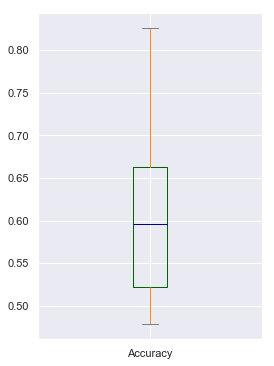

In [78]:
fold_df = pd.DataFrame({'Fold':fold_list,'Accuracy':accuracy_list}).set_index('Fold')
fold_df.plot(kind='box',figsize=(4,6),color=color)

# 3. ANN Multilayer Perceptron Classifier

## 3.1 ANN implementation using Scikit learn library.
- *Input nodes* : 9<br>
- *Hidden layers* :2<br>
- *Each hidden Layer* holds 14 neuron<br>
- *Output layer* : 2

In [79]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [80]:
ann_clf = MLPClassifier()

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1]}

In [81]:
# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

/Users/ame/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
# Fit the best algorithm to the data 
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=14, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [83]:
y_pred_ann = ann_clf.predict(X_test)

In [84]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[53,  7],
       [15, 18]])

In [85]:
ann_result = accuracy_score(y_test,y_pred_ann)
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])

In [86]:
print("- Accuracy : %f \n- Recall : %f \n- Precision : %f" % (ann_result, recall_ann,precision_ann))

- Accuracy : 0.763441 
- Recall : 0.883333 
- Precision : 0.746479


### 3.2 ANN implementation using keras library 

- Sequential Model
- *Input nodes* :9
- *Hidden layers* :2
- *Each layer* holds 6 neuron

In [89]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))

# Adding the second hidden layer
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
369/369 [==============================] - 0s 939us/step - loss: 0.6833 - acc: 0.6396
Epoch 2/100
369/369 [==============================] - 0s 188us/step - loss: 0.6610 - acc: 0.6558
Epoch 3/100
369/369 [==============================] - 0s 183us/step - loss: 0.6550 - acc: 0.6558
Epoch 4/100
369/369 [==============================] - 0s 189us/step - loss: 0.6498 - acc: 0.6558
Epoch 5/100
369/369 [==============================] - 0s 200us/step - loss: 0.6473 - acc: 0.6558
Epoch 6/100
369/369 [==============================] - 0s 177us/step - loss: 0.6360 - acc: 0.6640
Epoch 7/100
369/369 [==============================] - 0s 218us/step - loss: 0.6275 - acc: 0.6775
Epoch 8/100
369/369 [==============================] - 0s 176us/step - loss: 0.6217 - acc: 0.6721
Epoch 9/100
369/369 [==============================] - 0s 204us/step - loss: 0.6152 - acc: 0.6694
Epoch 10/100
369/369 [==============================] - 0s 200us/step - loss: 0.6092 - acc: 0.6667
Epoch 11/100
369/36

369/369 [==============================] - 0s 180us/step - loss: 0.5388 - acc: 0.7236
Epoch 84/100
369/369 [==============================] - 0s 168us/step - loss: 0.5419 - acc: 0.7317
Epoch 85/100
369/369 [==============================] - 0s 188us/step - loss: 0.5381 - acc: 0.7263
Epoch 86/100
369/369 [==============================] - 0s 162us/step - loss: 0.5367 - acc: 0.7480
Epoch 87/100
369/369 [==============================] - 0s 169us/step - loss: 0.5393 - acc: 0.7290
Epoch 88/100
369/369 [==============================] - 0s 216us/step - loss: 0.5401 - acc: 0.7182
Epoch 89/100
369/369 [==============================] - 0s 194us/step - loss: 0.5396 - acc: 0.7507
Epoch 90/100
369/369 [==============================] - 0s 188us/step - loss: 0.5422 - acc: 0.7371
Epoch 91/100
369/369 [==============================] - 0s 165us/step - loss: 0.5385 - acc: 0.7398
Epoch 92/100
369/369 [==============================] - 0s 168us/step - loss: 0.5367 - acc: 0.7480
Epoch 93/100
369/369 [=

In [90]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_annk = confusion_matrix(y_test, y_pred)

Confusion matrix obtained from keras NN 

In [88]:
cm_annk

array([[43, 17],
       [12, 21]])

In [91]:
annk_result = accuracy_score(y_test,y_pred)
recall_annk = cm_annk[0][0]/(cm_annk[0][0] + cm_annk[0][1])
precision_annk = cm_annk[0][0]/(cm_annk[0][0]+cm_annk[1][1])

In [92]:
print("- Accuracy : %f \n- Recall : %f \n- Precision : %f" % (annk_result, recall_annk,precision_annk))

- Accuracy : 0.709677 
- Recall : 0.766667 
- Precision : 0.696970


# Comparison of models

In [93]:
results ={'Accuracy': [svm_result*100,knn_result*100,ann_result*100],
          'Recall': [recall_svm*100,recall_knn*100,recall_ann*100],
          'Precision': [precision_svm*100,precision_knn*100,precision_ann*100]}
index = ['SVM','KNN','ANN']

In [94]:
results =pd.DataFrame(results,index=index)

Bar Plot of three model implemented<br>
X axis : Models<br>
Y axis : Values of Accuracy, Precision,Recall

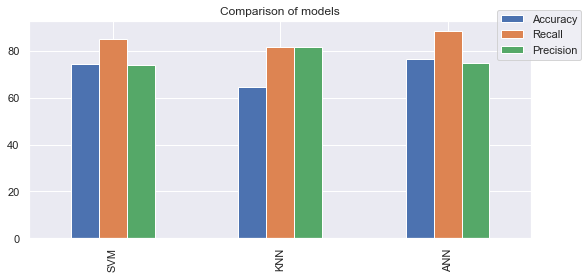

In [104]:
fig =results.plot(kind='bar',title='Comparison of models',figsize =(9,4), ).get_figure()
plt.legend(bbox_to_anchor=(1.1, 1.05), borderaxespad=0.)
#fig.savefig('Final Result.png')


Subplot of each measure in between the models

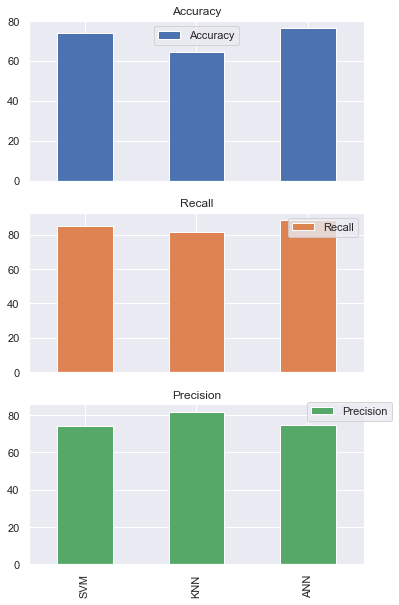

In [108]:
results.plot(subplots=True,kind ='bar',figsize=(6,10))
plt.legend(bbox_to_anchor=(1.1, 1.05))